In [1]:
import warnings, requests, zipfile, io
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import itertools
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

In [2]:
f_zip = "http://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip"
r = requests.get(f_zip, stream = True)
Vertebral_zip = zipfile.ZipFile(io.BytesIO(r.content))
Vertebral_zip.extractall()

In [3]:
data = arff.loadarff("column_2C_weka.arff")
#print(data[0], data[1])
df = pd.DataFrame(data[0])
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


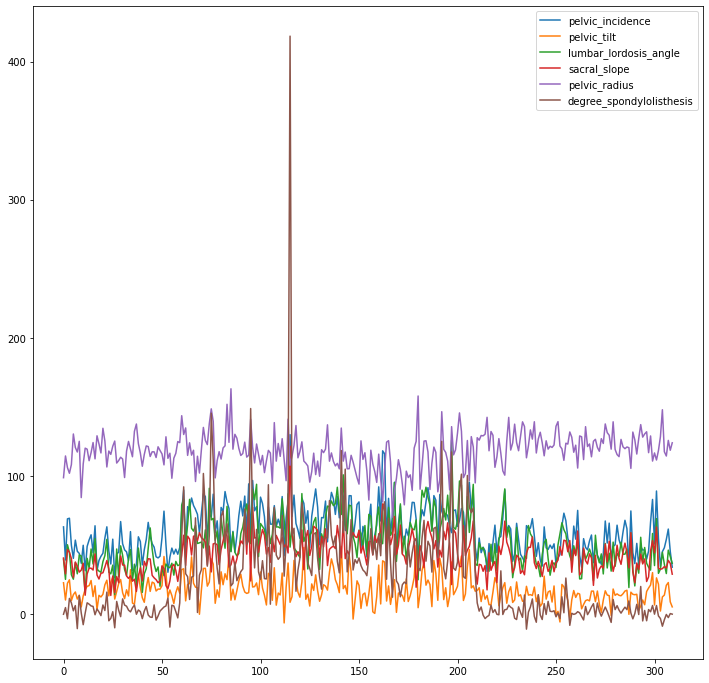

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [4]:
df.plot(figsize = (12,12))
plt.show()
df.describe()

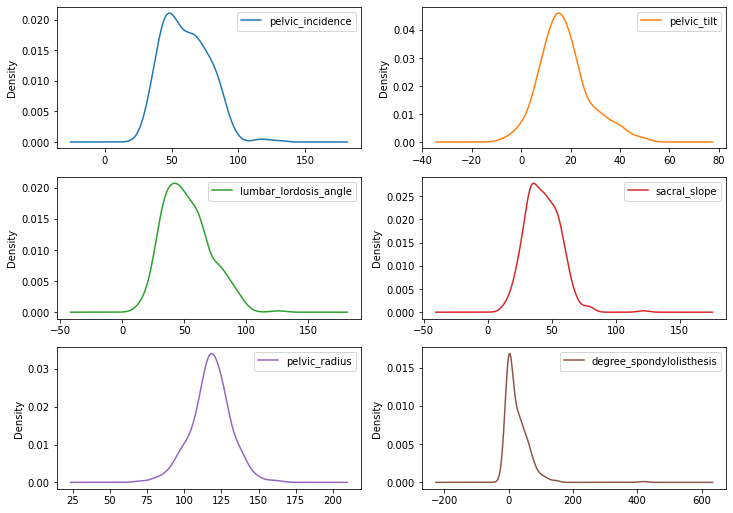

In [5]:
df.plot(kind="density",subplots = True,layout = (4,2),figsize = (12,12),sharex = False)
plt.show()

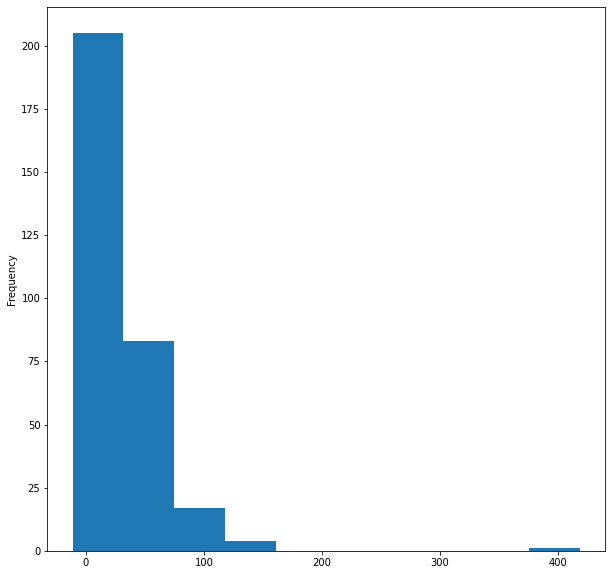

In [6]:
df["degree_spondylolisthesis"].plot.hist(figsize = (10,10))
plt.show()

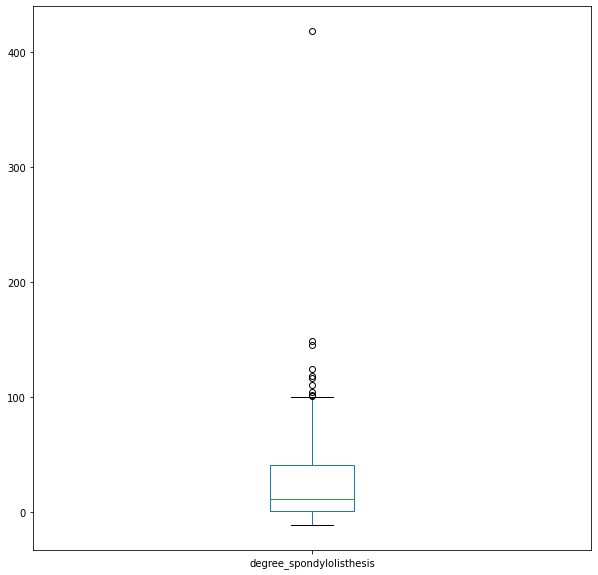

In [7]:
df["degree_spondylolisthesis"].plot.box(figsize = (10,10))
plt.show()

In [8]:
df["class"].value_counts()

b'Abnormal'    210
b'Normal'      100
Name: class, dtype: int64

In [9]:
class_mapper = {b"Abnormal":1,b"Normal":0}
df["class"] = df["class"].replace(class_mapper)

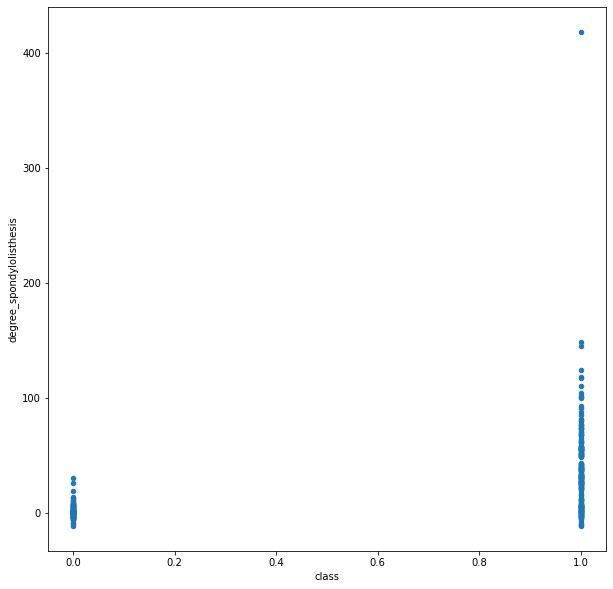

In [10]:
df.plot.scatter(y = "degree_spondylolisthesis",x = "class", figsize = (10,10))
plt.show()

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

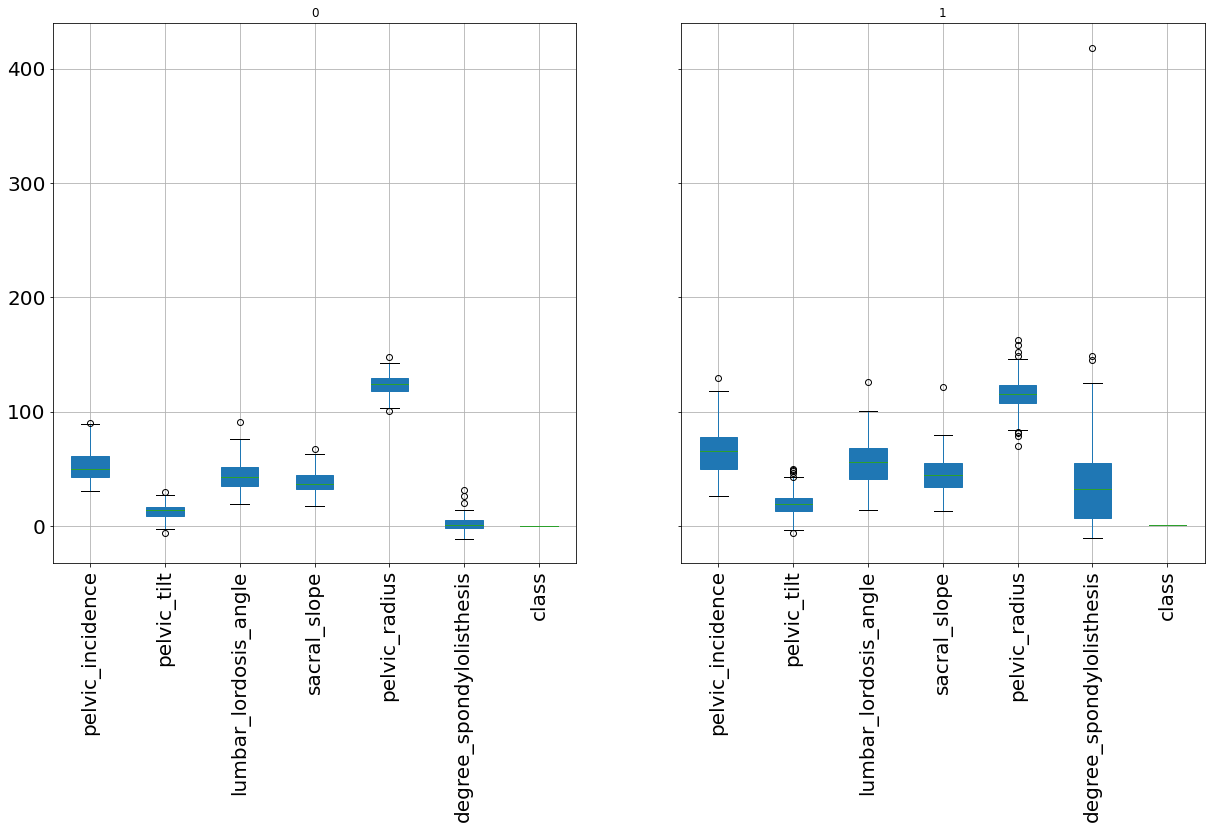

In [11]:
df.groupby("class").boxplot(fontsize = 20,rot = 90,figsize = (20,10),patch_artist = True)

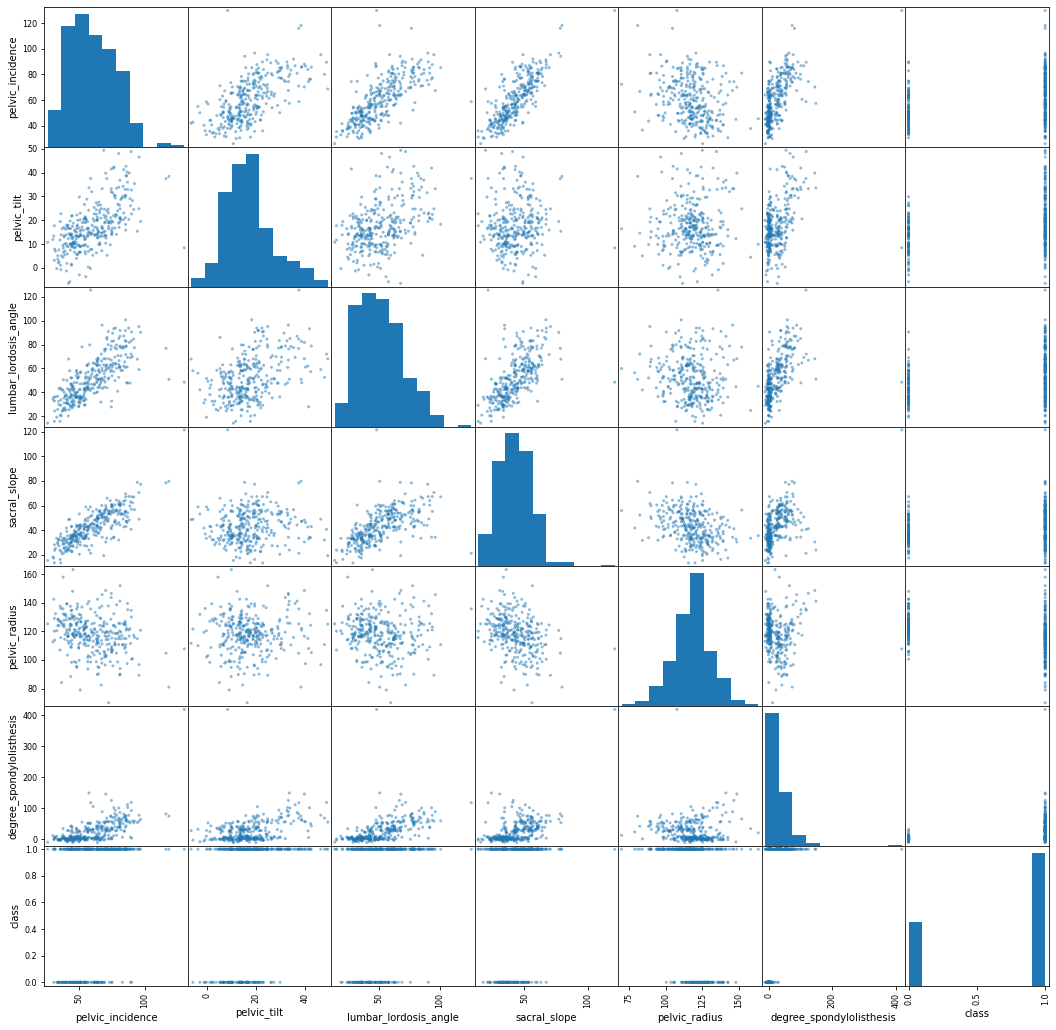

In [12]:
corr_matrix = df.corr()
corr_matrix["class"].sort_values(ascending = False)
pd.plotting.scatter_matrix(df,figsize = (18,18))
plt.show()

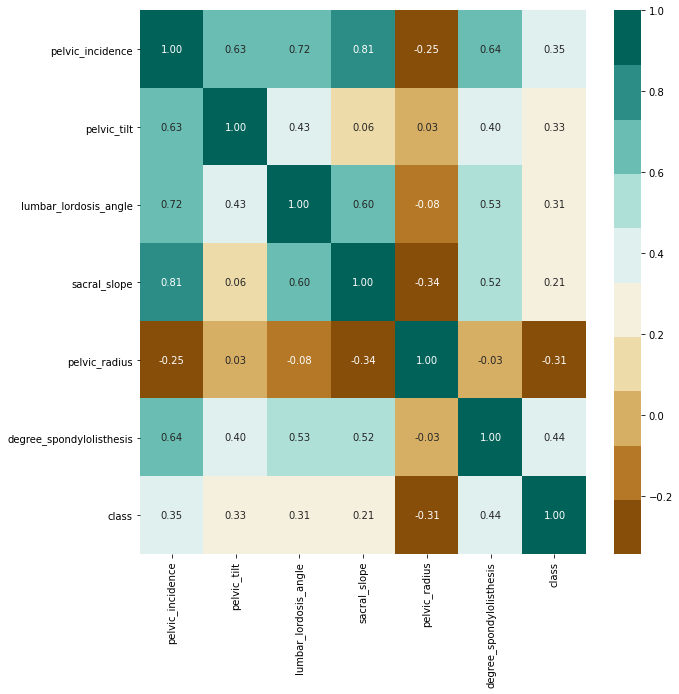

In [13]:
fig, ax = plt.subplots(figsize = (10, 10))
colormap = sb.color_palette("BrBG", 10)
sb.heatmap(corr_matrix, cmap = colormap, annot=True, fmt = ".2f")
plt.show()

In [14]:
z = np.abs(stats.zscore(df))
threshold = 2
print(np.where(z > threshold))

(array([  9,  11,  24,  26,  26,  51,  65,  71,  74,  75,  75,  75,  76,
        83,  84,  85,  94,  95,  96,  96,  96,  98, 112, 115, 115, 115,
       117, 122, 136, 139, 141, 141, 142, 143, 145, 147, 155, 162, 162,
       162, 162, 163, 163, 167, 168, 168, 168, 168, 173, 177, 179, 180,
       181, 182, 184, 186, 188, 190, 191, 192, 192, 196, 197, 197, 197,
       201, 201, 202, 202, 206, 206, 208, 224, 252, 257, 304]), array([4, 3, 3, 2, 3, 1, 1, 5, 2, 1, 4, 5, 5, 4, 1, 4, 3, 5, 0, 2, 3, 2,
       1, 0, 3, 5, 1, 1, 1, 2, 1, 5, 2, 5, 1, 1, 4, 0, 1, 3, 4, 0, 3, 4,
       0, 2, 3, 4, 4, 4, 1, 4, 4, 2, 2, 4, 1, 4, 1, 4, 5, 4, 1, 2, 5, 2,
       4, 1, 2, 0, 1, 2, 2, 1, 1, 4]))


In [15]:
print("before : ", df.shape)
df = df[(z < threshold).all(axis=1)]
print("after : ", df.shape)

before :  (310, 7)
after :  (255, 7)


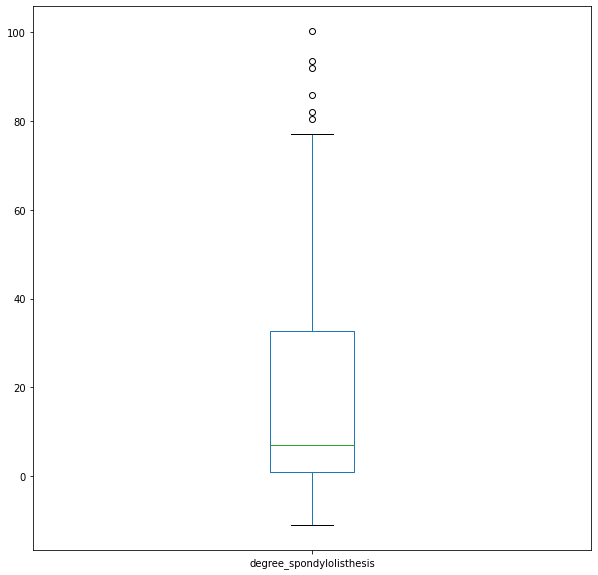

In [16]:
df['degree_spondylolisthesis'].plot.box(figsize = (10, 10))
plt.show()

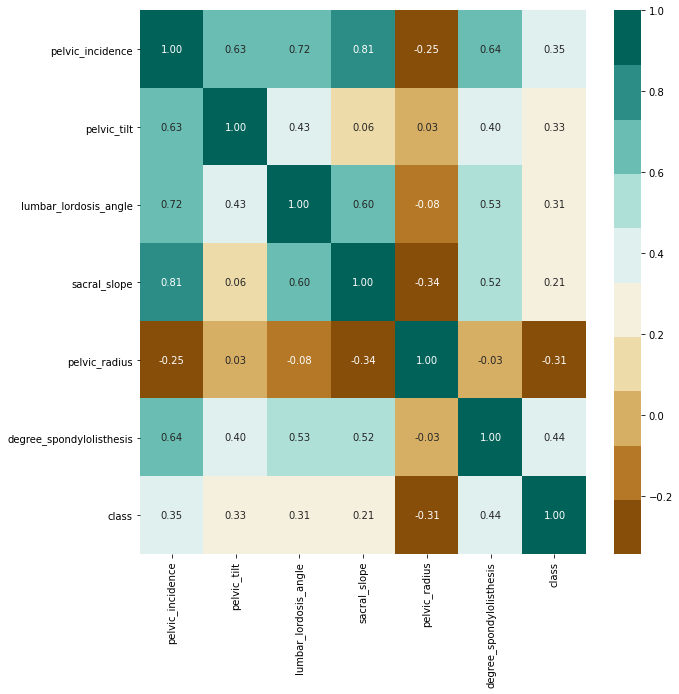

In [17]:
fig, ax = plt.subplots(figsize = (10, 10))
colormap = sb.color_palette("BrBG", 10)
sb.heatmap(corr_matrix, cmap = colormap, annot = True, fmt = ".2f")
plt.show()

In [18]:
X = df[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope","pelvic_radius","degree_spondylolisthesis"]]
Y = df["class"]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)

In [19]:
k = X.shape[1]
RSS, ACC, features = [],[],[]
n = []

for k in range(1,len(X.columns) + 1):
    for i in itertools.combinations(X.columns, k):  
        SVM = SVC().fit(X[list(i)], Y)
        RSS.append(mean_squared_error(Y, SVM.predict(X[list(i)])) * len(Y))
        ACC.append(accuracy_score(Y, SVM.predict(X[list(i)])))
        features.append(i)
        n.append(len(i))   

subset = pd.DataFrame({"n": n,"RSS": RSS, "ACC":ACC,"features": features})

subset["Min_RSS"] = subset.groupby("n")["RSS"].transform(min)
subset["Max_ACC"] = subset.groupby("n")["ACC"].transform(max)
print(subset)

    n   RSS  ...  Min_RSS   Max_ACC
0   1  91.0  ...     62.0  0.756863
1   1  94.0  ...     62.0  0.756863
2   1  96.0  ...     62.0  0.756863
3   1  86.0  ...     62.0  0.756863
4   1  79.0  ...     62.0  0.756863
.. ..   ...  ...      ...       ...
58  5  47.0  ...     42.0  0.835294
59  5  42.0  ...     42.0  0.835294
60  5  48.0  ...     42.0  0.835294
61  5  43.0  ...     42.0  0.835294
62  6  43.0  ...     43.0  0.831373

[63 rows x 6 columns]


In [20]:
Max_ACC = subset["ACC"].max()
Min_RSS = subset["RSS"].min()
print("Max ACC  : ", Max_ACC)
print("Min RSS : ", Min_RSS)
index_ACC = subset["ACC"].idxmax()
index_RSS = subset["RSS"].idxmin()
print (subset["features"][index_ACC])
print (subset["features"][index_RSS])

Max ACC  :  0.8352941176470589
Min RSS :  42.0
('pelvic_incidence', 'pelvic_tilt', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis')
('pelvic_incidence', 'pelvic_tilt', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis')


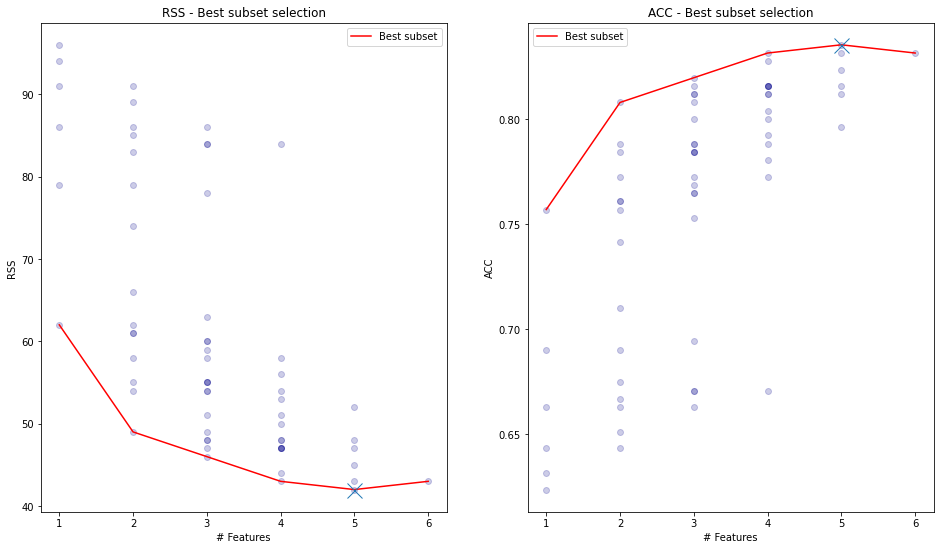

In [21]:
figure = plt.figure(figsize = (16,9))
subFigure = figure.add_subplot(1, 2, 1)

subFigure.scatter(subset["n"], subset["RSS"], alpha = 0.2, color = "darkblue")
subFigure.set_xlabel("# Features")
subFigure.set_ylabel("RSS")
subFigure.set_title("RSS - Best subset selection")
subFigure.plot(subset["n"], subset["Min_RSS"], color = "r", label = "Best subset")
subFigure.plot(subset["n"][index_RSS],subset["RSS"][index_RSS], marker = "x", markersize = 15)
subFigure.legend()

subFigure = figure.add_subplot(1, 2, 2)
subFigure.scatter(subset["n"], subset["ACC"], alpha = 0.2, color = "darkblue")
subFigure.plot(subset["n"],subset["Max_ACC"], color = "r", label = "Best subset")
subFigure.plot(subset["n"][index_ACC],subset["ACC"][index_ACC], marker = "x", markersize = 15)
subFigure.set_xlabel("# Features")
subFigure.set_ylabel("ACC")
subFigure.set_title("ACC - Best subset selection")
subFigure.legend()

plt.show()

In [22]:
print(df["class"].value_counts())

1    159
0     96
Name: class, dtype: int64


In [23]:
nAbnormal, nNormal = df["class"].value_counts()
abnormal = df[df["class"] == 1]
normal = df[df["class"] == 0]

abnormal = abnormal.sample(nNormal)

dfResampledU = pd.concat([normal, abnormal], axis=0)

print(dfResampledU["class"].value_counts())

1    96
0    96
Name: class, dtype: int64


In [24]:
abnormal = df[df["class"] == 1]
normal = normal.sample(nAbnormal, replace = True)
dfResampledO = pd.concat([normal, abnormal], axis=0)
print(dfResampledO["class"].value_counts())

1    159
0    159
Name: class, dtype: int64


In [25]:
abnormal = df[df["class"] == 1]
normal = df[df["class"] == 0]

normal = normal.sample(120, replace = True)
abnormal = abnormal.sample(120)
dfResampledH = pd.concat([normal, abnormal], axis=0)
print(dfResampledH["class"].value_counts())

1    120
0    120
Name: class, dtype: int64


In [61]:
X = df[["pelvic_incidence", "pelvic_tilt", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]
Y = df["class"]

XU = dfResampledU[["pelvic_incidence", "pelvic_tilt", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]
YU = dfResampledU["class"]

XO = dfResampledO[["pelvic_incidence", "pelvic_tilt", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]
YO = dfResampledO["class"]

XH = dfResampledH[["pelvic_incidence", "pelvic_tilt", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]
YH = dfResampledH["class"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)
XUTrain, XUTest, YUTrain, YUTest = train_test_split(XU, YU, test_size=0.2)
XOTrain, XOTest, YOTrain, YOTest = train_test_split(XO, YO, test_size=0.2)
XHTrain, XHTest, YHTrain, YHTest = train_test_split(XH, YH, test_size=0.2)

SVM = SVC().fit(XTrain, YTrain)
SVMU = SVC().fit(XUTrain, YUTrain)
SVMO = SVC().fit(XOTrain, YOTrain)
SVMH = SVC().fit(XHTrain, YHTrain)


CTest = SVM.predict(XTest)
CUTest  = SVMU.predict(XUTest)
COTest  = SVMO.predict(XOTest)
CHTest  = SVMH.predict(XHTest)

CTrain = SVM.predict(XTrain)
CUTrain  = SVMU.predict(XUTrain)
COTrain  = SVMO.predict(XOTrain)
CHTrain  = SVMH.predict(XHTrain)

print("Train set ori acc: ", accuracy_score(YTrain, CTrain))
print("Test set ori acc: ", accuracy_score(YTest, CTest))

print("Train set under acc: ", accuracy_score(YUTrain, CUTrain))
print("Test set under acc: ", accuracy_score(YUTest, CUTest))

print("Train set over acc: ", accuracy_score(YOTrain, COTrain))
print("Test set over acc: ", accuracy_score(YOTest, COTest))

print("Train set hybrid acc: ", accuracy_score(YHTrain, CHTrain))
print("Test set hybrid acc: ", accuracy_score(YHTest, CHTest))



Train set ori acc:  0.8382352941176471
Test set ori acc:  0.803921568627451
Train set under acc:  0.8104575163398693
Test set under acc:  0.8717948717948718
Train set over acc:  0.8031496062992126
Test set over acc:  0.9375
Train set hybrid acc:  0.828125
Test set hybrid acc:  0.7708333333333334


In [27]:
print(classification_report(YUTrain, CUTrain))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84        73
           1       0.96      0.68      0.79        80

    accuracy                           0.82       153
   macro avg       0.85      0.82      0.81       153
weighted avg       0.85      0.82      0.81       153



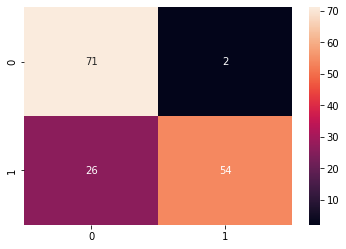

In [29]:
cm =  confusion_matrix(YUTrain, CUTrain)
sb.heatmap(cm, annot = True)
plt.show()

In [43]:
from sklearn.ensemble import RandomForestRegressor

X = df[["pelvic_incidence", "pelvic_tilt", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]
Y = df["class"]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)

forest = RandomForestRegressor().fit(XTrain, YTrain)

print(forest.score(XTrain, YTrain))
print(forest.score(XTest, YTest))
print(forest.get_params())

0.9122409950657895
0.4412538709677418
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C" : [0.01, 0.1, 1, 10, 100, 1000], 
              "gamma" : [1, 0.1, 0.01, 0.001, 0.0001],
              "kernel" : ["rbf"]} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
  
grid.fit(XTrain, YTrain)

print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [52]:
CGTrain = grid.predict(XTrain)
CGTest = grid.predict(XTest)
print("Train set ori acc: ", accuracy_score(YTrain, CGTrain))
print("Test set ori acc: ", accuracy_score(YTest, CGTest))

Train set ori acc:  0.8627450980392157
Test set ori acc:  0.8823529411764706
